In [87]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

In [3]:
# fetch dataset
spambase = fetch_ucirepo(id=94)

In [4]:
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

In [18]:
# data (as pandas dataframes)
X = spambase.data.features.to_numpy()
y = spambase.data.targets.to_numpy()

In [61]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=41)
y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()

# Naive bayes on normal data

In [62]:
classes = np.unique(y_train)
n_row,n_col = X_train.shape
n_classes = len(classes)
mean_np = np.zeros((2,n_col),dtype=np.float64)
variance_np = np.zeros((2,n_col),dtype=np.float64)

In [63]:
class_prior=np.zeros(n_classes,dtype=np.float64)
class_prior[0]=sum(y_train==0)/n_row
class_prior[1]=sum(y_train==1)/n_row

In [64]:
for n_class in range(0,2):
    sample = X_train[y_train == n_class ]
    for cur_col in range(n_col):
        mean_np[n_class,cur_col]=np.mean(X_train[:,cur_col])
        variance_np[n_class,cur_col]=np.var(X_train[:,cur_col])
        

In [65]:
def normal_distribution(target,mean,var):
    numerator = np.exp(- (target-mean)**2 / (2 * var))
    denominator = np.sqrt(2 * np.pi * var)
    return numerator/denominator

In [66]:
def predict(X_test):
    n_r,n_c = X_test.shape
    y_pred=[]
    for i in range(n_r):
        c_0=np.log(class_prior[0])
        c_1=np.log(class_prior[1])
        for col in range(n_c):
            c_0+= np.log(normal_distribution(X_test[i][col],mean_np[0][col],variance_np[0][col]))
            c_1+= np.log(normal_distribution(X_test[i][col],mean_np[1][col],variance_np[1][col]))
        if(c_0<c_1):
            y_pred.append(0)
        else:
            y_pred.append(1)
    return np.array(y_pred)
            
    

In [67]:
y_pred=predict(X_test)

<ipython-input-65-0faf6e79c7ce>:2: RuntimeWarning: invalid value encountered in scalar divide
  numerator = np.exp(- (target-mean)**2 / (2 * var))
<ipython-input-66-71b095ccc6fc>:8: RuntimeWarning: divide by zero encountered in log
  c_0+= np.log(normal_distribution(X_test[i][col],mean_np[0][col],variance_np[0][col]))
<ipython-input-66-71b095ccc6fc>:9: RuntimeWarning: divide by zero encountered in log
  c_1+= np.log(normal_distribution(X_test[i][col],mean_np[1][col],variance_np[1][col]))
<ipython-input-65-0faf6e79c7ce>:2: RuntimeWarning: divide by zero encountered in scalar divide
  numerator = np.exp(- (target-mean)**2 / (2 * var))
<ipython-input-65-0faf6e79c7ce>:4: RuntimeWarning: invalid value encountered in scalar divide
  return numerator/denominator


In [68]:
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.3979739507959479
Precision: 0.3979739507959479
Recall: 1.0
F1-Score: 0.5693581780538302


# Naive Bayes after Log transformation

In [84]:
X = np.log1p(X)
X = np.where(np.isinf(X) | np.isnan(X), 0, X)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=41)
y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()

In [85]:
y_pred=predict(X_test)

<ipython-input-65-0faf6e79c7ce>:2: RuntimeWarning: invalid value encountered in scalar divide
  numerator = np.exp(- (target-mean)**2 / (2 * var))


In [86]:
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.3979739507959479
Precision: 0.3979739507959479
Recall: 1.0
F1-Score: 0.5693581780538302


# using sckit learn library

In [73]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=41)
y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()
original_model = GaussianNB()
original_model.fit(X_train, y_train)

GaussianNB()

In [82]:
X_log = np.log1p(X)
X_log = np.where(np.isinf(X_log) | np.isnan(X_log), 0, X_log)
X_train_log, X_temp_log, y_train_log, y_temp_log = train_test_split(X_log, y, test_size=0.3, random_state=41)
X_val_log, X_test_log, y_val_log, y_test_log = train_test_split(X_temp_log, y_temp_log, test_size=0.5, random_state=41)
y_train_log = y_train_log.ravel()
y_test_log = y_test_log.ravel()
y_val = y_val.ravel()
log_transformed_model = GaussianNB()
log_transformed_model.fit(X_log, y)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [83]:
y_pred_o = original_model.predict(X_test)
y_pred_log = log_transformed_model.predict(X_test_log) 

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\naive_bayes.py:453: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\naive_bayes.py:453: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /


In [88]:
#Calculate ROC curve and AUC for model1
fpr1, tpr1, _ = roc_curve(y_test, y_pred_o)
roc_auc1 = auc(fpr1, tpr1)

# Calculate ROC curve and AUC for model2
fpr2, tpr2, _ = roc_curve(y_test, y_pred_log)
roc_auc2 = auc(fpr2, tpr2)

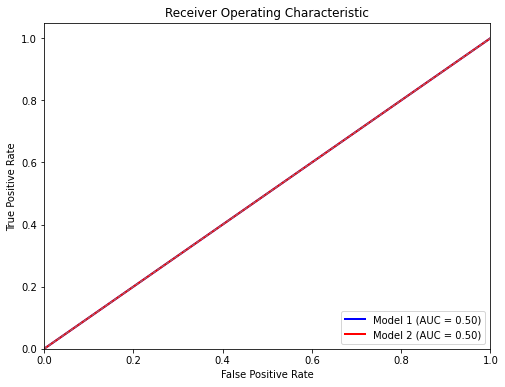

In [89]:
# Plot the ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Model 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='r', lw=2, label=f'Model 2 (AUC = {roc_auc2:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

In [90]:
accuracy_original = accuracy_score(y_test, y_pred_o)
print(f"Accuracy for the original model: {accuracy_original}")

# Calculate accuracy for the log-transformed model
accuracy_log_transformed = accuracy_score(y_test, y_pred_log)
print(f"Accuracy for the log-transformed model: {accuracy_log_transformed}")

Accuracy for the original model: 0.6020260492040521
Accuracy for the log-transformed model: 0.6020260492040521
